In [1]:
# Installer TensorFlow Version 2
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

2.8.2


In [2]:
# Importation de bibliothèques

import tensorflow.keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import metrics
import matplotlib.pyplot as plt

import numpy as np


In [3]:
train_loc = 'drive/My Drive/Dataset/train/'
test_loc = 'drive/My Drive/Dataset/val/'

In [4]:
# redimensionner les images

trdata = ImageDataGenerator(rescale= 1./255,
                            shear_range = 0.2,
                            zoom_range = 0.2,
                            horizontal_flip = True,
)

traindata = trdata.flow_from_directory(directory = train_loc, target_size = (224,224))

tsdata = ImageDataGenerator(rescale= 1./255,
                            shear_range = 0.2,
                            zoom_range = 0.2,
                            horizontal_flip = True,
)

testdata = tsdata.flow_from_directory(directory = test_loc, target_size = (224,224))

Found 250 images belonging to 2 classes.
Found 110 images belonging to 2 classes.


In [5]:
traindata.class_indices

{'Normal': 0, 'Positive': 1}

In [19]:
# Création du réseau CNN

# Couches convolutatif
model = Sequential()
model.add(Conv2D(32, (3,3) , padding = 'same' , activation='relu',input_shape=(224,224,3), name = 'layer_1'))
model.add(Conv2D(64, (3,3) , padding = 'same' , activation='relu', name = 'layer_2'))
model.add(MaxPool2D((2,2), strides=(2,2), name = 'layer_3'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3) , padding = 'same' , activation='relu', name = 'layer_4'))
model.add(MaxPool2D((2,2), strides=(2,2), name = 'layer_5'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3) , padding = 'same' , activation='relu', name = 'layer_6'))
model.add(MaxPool2D((2,2), strides=(2,2), name = 'layer_7'))
model.add(Dropout(0.25))


# Couche entièrement connectée (Fully-connected)
model.add(Flatten(name = 'fc_1'))
model.add(Dense(64, name = 'lyaer_8'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', name='SIGMOID'))


In [20]:
# Imprimer la structure du réseau
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Conv2D)            (None, 224, 224, 32)      896       
                                                                 
 layer_2 (Conv2D)            (None, 224, 224, 64)      18496     
                                                                 
 layer_3 (MaxPooling2D)      (None, 112, 112, 64)      0         
                                                                 
 dropout_12 (Dropout)        (None, 112, 112, 64)      0         
                                                                 
 layer_4 (Conv2D)            (None, 112, 112, 64)      36928     
                                                                 
 layer_5 (MaxPooling2D)      (None, 56, 56, 64)        0         
                                                                 
 dropout_13 (Dropout)        (None, 56, 56, 64)       

In [21]:
# Compilant le modèle
model.compile(optimizer='adam', loss=binary_crossentropy, metrics=['accuracy'])

In [22]:
# Démarrer train/test
batch_size = 32
hist = model.fit(traindata, steps_per_epoch = traindata.samples//batch_size,
                 validation_data = testdata,validation_steps = testdata.samples//batch_size,
                 epochs = 20
                 )

Epoch 1/20
7/7 [==============================] - 13s 2s/step - loss: 3.0868 - accuracy: 0.7431 - val_loss: 0.6525 - val_accuracy: 0.7188
Epoch 2/20
7/7 [==============================] - 13s 2s/step - loss: 0.5172 - accuracy: 0.8073 - val_loss: 0.4657 - val_accuracy: 0.8750
Epoch 3/20
7/7 [==============================] - 12s 2s/step - loss: 0.3560 - accuracy: 0.8670 - val_loss: 0.2935 - val_accuracy: 0.9375
Epoch 4/20
7/7 [==============================] - 12s 2s/step - loss: 0.3002 - accuracy: 0.8807 - val_loss: 0.3503 - val_accuracy: 0.9271
Epoch 5/20
7/7 [==============================] - 12s 2s/step - loss: 0.2379 - accuracy: 0.9174 - val_loss: 0.2769 - val_accuracy: 0.8854
Epoch 6/20
7/7 [==============================] - 12s 2s/step - loss: 0.2623 - accuracy: 0.9312 - val_loss: 0.3987 - val_accuracy: 0.9062
Epoch 7/20
7/7 [==============================] - 12s 2s/step - loss: 0.1686 - accuracy: 0.9450 - val_loss: 0.1323 - val_accuracy: 0.9688
Epoch 8/20
7/7 [==================

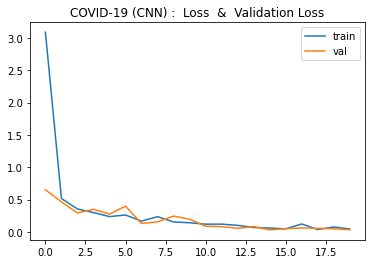

In [23]:
plt.plot(hist.history['loss'], label = 'train')
plt.plot(hist.history['val_loss'], label = 'val')
plt.title('COVID-19 (CNN) :  Loss  &  Validation Loss')
plt.legend()
plt.show()

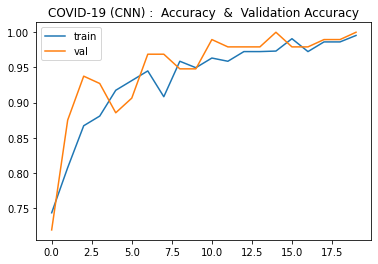

In [24]:
plt.plot(hist.history['accuracy'], label = 'train')
plt.plot(hist.history['val_accuracy'], label = 'val')
plt.title('COVID-19 (CNN) :  Accuracy  &  Validation Accuracy')
plt.legend()
plt.show()

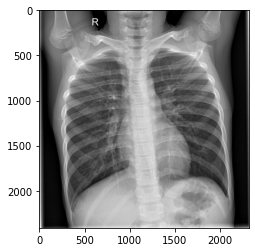

Prediction :  Negative
Probability :  1.0


In [17]:
# tester le modèle 
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image_path = 'negative.jpeg'


img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.show()

test_image = image.load_img(image_path,
                            target_size= (224, 224))

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis= 0)
result = model.predict(test_image)
traindata.class_indices
if result[0][0]==1:
  prediction = 'Negative'
else:
  prediction = 'Positive'


accuracy=float(np.max(result,axis=1)[0])
print('Prediction : ', prediction)
print('Probability : ', accuracy)
